# KG & LLMs Bootcamp Hands-On: Mining Entities and Relations

In this session we will see and compare ways to mine entities and relations for a knowledge graph, with and without LLMs

# Question 1

In [4]:
import pandas as pd
data = pd.read_csv('assignment3_dataset.tsv', sep='\t')
data

,text,subject,object,relation_in_sentence
0,All John wants is to live in Palo Alto.,John,Palo Alto,unknown
1,"Although Jane was married, John was not.",John,Jane,unknown
2,Apple does not employ John.,John,Apple,unknown
3,Apple extended a job offer to John.,John,Apple,unknown
4,Apple gave John an offer for a job.,John,Apple,unknown
...,...,...,...,...
315,John was married to Jane,John,Jane,spouse
316,John worked for Apple.,John,Apple,employee_of
317,John works for Apple.,John,Apple,employee_of
318,John's Alma Mater is Stanford University.,John,Stanford University,schools_attended


In [56]:
relations = data.relation_in_sentence.unique().tolist()

In [16]:
from llama_index.llms.ollama import Ollama

# Trying with llama3.2:3b-instruct-fp16

In [7]:
llm = Ollama(model='llama3.2:3b-instruct-fp16', request_timeout=60.0, temperature=0, max_tokens=500)

In [57]:
import json
def extract_json(json_str):
    return json.loads(json_str.replace("```","").replace('json',''))

results = []
for index, row in data.iterrows():
    prompt_template = f"""Analyze the sentence to identify if there is a clear, explicitly stated relation between the subject and object entities. Return ONLY a single JSON key-value pair with "relation" as the key and the matched relation or "Unknown" as the value.

Input:
- Sentence: {row['text']}
- Subject: {row['subject']} 
- Object: {row['object']}

Consider these relations ONLY if directly and unambiguously stated in the sentence:
- cities_of_residence: relates a person to cities where their physical residence is explicitly mentioned in a factual way
- employee_of: relates a person to organizations where their employment status is explicitly mentioned through clear terms like "works for", "is employed by", "joined", etc.
- schools_attended: relates a person to educational institutions where their student status is explicitly mentioned through clear terms like "studies at", "attended", "graduated from", etc.
- spouse: relates a person to persons where their marriage status is explicitly mentioned through clear terms like "married to", "wed", etc.

Return "Unknown" if ANY of these conditions exist:
1. The relation is implied but not explicitly stated
2. Any temporal ambiguity exists about when the relation occurred
3. The sentence contains qualifiers, modalities, or uncertainties
4. The relation direction is not 100% clear
5. Multiple interpretations of the relationship are possible
6. The sentence uses future tense or hypotheticals
7. The relationship is mentioned in passing or as background information
8. Any nuanced context that requires interpretation
9. The sentence describes wishes, plans, or intentions
10. The relation is negated or questioned

Rules
- Do not add any introduction or conclusion to the response

Response:""" 

    print(prompt_template)
    response = llm.complete(prompt_template)
    print(response)
    results.append(response.text)


Analyze the sentence to identify if there is a clear, explicitly stated relation between the subject and object entities. Return ONLY a single JSON key-value pair with "relation" as the key and the matched relation or "Unknown" as the value.

Input:
- Sentence: All John wants is to live in Palo Alto.
- Subject: John 
- Object: Palo Alto

Consider these relations ONLY if directly and unambiguously stated in the sentence:
- cities_of_residence: relates a person to cities where their physical residence is explicitly mentioned in a factual way
- employee_of: relates a person to organizations where their employment status is explicitly mentioned through clear terms like "works for", "is employed by", "joined", etc.
- schools_attended: relates a person to educational institutions where their student status is explicitly mentioned through clear terms like "studies at", "attended", "graduated from", etc.
- spouse: relates a person to persons where their marriage status is explicitly mentioned 

In [58]:
results = [extract_json(result) for result in results]
results

[{'relation': 'Unknown'},
 {'relation': 'Unknown'},
 {'relation': 'Unknown'},
 {'relation': 'Unknown'},
 {'relation': 'Unknown'},
 {'relation': 'Unknown'},
 {'relation': 'Unknown'},
 {'relation': 'Unknown'},
 {'relation': 'Unknown'},
 {'relation': 'Unknown'},
 {'relation': 'Unknown'},
 {'relation': 'Unknown'},
 {'relation': 'Unknown'},
 {'relation': 'Unknown'},
 {'relation': 'Unknown'},
 {'relation': 'Unknown'},
 {'relation': 'Unknown'},
 {'relation': 'Unknown'},
 {'relation': 'Unknown'},
 {'relation': 'Unknown'},
 {'relation': 'Unknown'},
 {'relation': 'Unknown'},
 {'relation': 'Unknown'},
 {'relation': 'Unknown'},
 {'relation': 'Unknown'},
 {'relation': 'Unknown'},
 {'relation': 'Unknown'},
 {'relation': 'Unknown'},
 {'relation': 'Unknown'},
 {'relation': 'Unknown'},
 {'relation': 'Unknown'},
 {'relation': 'Unknown'},
 {'relation': 'Unknown'},
 {'relation': 'Unknown'},
 {'relation': 'Unknown'},
 {'relation': 'Unknown'},
 {'relation': 'Unknown'},
 {'relation': 'Unknown'},
 {'relation'

In [59]:
merged_df = pd.concat([data, pd.DataFrame(results)], axis=1)
merged_df

,text,subject,object,relation_in_sentence,relation
0,All John wants is to live in Palo Alto.,John,Palo Alto,unknown,Unknown
1,"Although Jane was married, John was not.",John,Jane,unknown,Unknown
2,Apple does not employ John.,John,Apple,unknown,Unknown
3,Apple extended a job offer to John.,John,Apple,unknown,Unknown
4,Apple gave John an offer for a job.,John,Apple,unknown,Unknown
...,...,...,...,...,...
315,John was married to Jane,John,Jane,spouse,spouse
316,John worked for Apple.,John,Apple,employee_of,employee_of
317,John works for Apple.,John,Apple,employee_of,employee_of
318,John's Alma Mater is Stanford University.,John,Stanford University,schools_attended,schools_attended


In [61]:
merged_df.rename(columns={"relation":"predicted_relation"}, inplace=True)
merged_df['predicted_relation'] = merged_df['predicted_relation'].str.lower()
merged_df

,text,subject,object,relation_in_sentence,predicted_relation
0,All John wants is to live in Palo Alto.,John,Palo Alto,unknown,unknown
1,"Although Jane was married, John was not.",John,Jane,unknown,unknown
2,Apple does not employ John.,John,Apple,unknown,unknown
3,Apple extended a job offer to John.,John,Apple,unknown,unknown
4,Apple gave John an offer for a job.,John,Apple,unknown,unknown
...,...,...,...,...,...
315,John was married to Jane,John,Jane,spouse,spouse
316,John worked for Apple.,John,Apple,employee_of,employee_of
317,John works for Apple.,John,Apple,employee_of,employee_of
318,John's Alma Mater is Stanford University.,John,Stanford University,schools_attended,schools_attended


In [91]:
import pandas as pd
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def evaluate_relation_extraction(df):
    """
    Evaluate relation extraction predictions with precision, recall, and F1 score for each relation type.
    
    Parameters:
    df (pandas.DataFrame): DataFrame with columns 'relation_in_Sentence' (true) and 'relation' (predicted)
    
    Returns:
    tuple: (metrics_df, detailed_report)
    """
    # List of possible relations    
    # Calculate precision, recall, and F1 for each class

    relations = list(df['relation_in_sentence'].unique())
    precision, recall, f1, support = precision_recall_fscore_support(
        df['relation_in_sentence'],
        df['predicted_relation'],
        labels=relations,
        zero_division=0
    )
    
    # Create metrics DataFrame
    metrics_df = pd.DataFrame({
        'Relation': relations,
        'Precision': precision,
        'Recall': recall,
        'F1': f1,
        'Support': support
    })
    
    # Calculate confusion matrix
    cm = confusion_matrix(
        df['relation_in_sentence'],
        df['predicted_relation'],
        labels=relations
    )
    
    # Calculate per-class accuracy
    class_accuracy = cm.diagonal() / cm.sum(axis=1)
    
    # Detailed report dictionary
    detailed_report = {
        'overall_accuracy': (df['predicted_relation'] == df['relation_in_sentence']).mean(),
        'per_class_accuracy': dict(zip(relations, class_accuracy)),
        'confusion_matrix': cm,
        'class_distribution': df['relation_in_sentence'].value_counts().to_dict()
    }
    
    return metrics_df, detailed_report

def plot_confusion_matrix(confusion_matrix, relations):
    """
    Plot confusion matrix as a heatmap.
    """
    plt.figure(figsize=(10, 8))
    sns.heatmap(confusion_matrix, 
                annot=True, 
                fmt='d', 
                xticklabels=relations,
                yticklabels=relations)
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    
def print_evaluation_report(metrics_df, detailed_report):
    """
    Print a formatted evaluation report.
    """
    print("\n=== Relation Extraction Evaluation Report ===\n")
    
    print("Per-Class Metrics:")
    print(metrics_df.to_string(index=False))
    
    print("\nOverall Accuracy: {:.2%}".format(detailed_report['overall_accuracy']))
    
    print("\nPer-Class Accuracy:")
    for relation, accuracy in detailed_report['per_class_accuracy'].items():
        print(f"{relation}: {accuracy:.2%}")
    
    print("\nClass Distribution:")
    total = sum(detailed_report['class_distribution'].values())
    for relation, count in detailed_report['class_distribution'].items():
        percentage = count / total * 100
        print(f"{relation}: {count} samples ({percentage:.1f}%)")

In [95]:
merged_df[merged_df['relation_in_sentence'] != merged_df['predicted_relation']]

,text,subject,object,relation_in_sentence,predicted_relation
57,John and Jane will be wed.,John,Jane,unknown,spouse
159,John is taking Jane as his wife.,John,Jane,unknown,spouse
160,John is to wed Jane.,John,Jane,unknown,spouse
312,John used to live in Palo Alto,John,Palo Alto,cities_of_residence,unknown



=== Relation Extraction Evaluation Report ===

Per-Class Metrics:
           Relation  Precision  Recall       F1  Support
cities_of_residence   1.000000     0.9 0.947368       10
        employee_of   1.000000     1.0 1.000000        8
   schools_attended   1.000000     1.0 1.000000       14
             spouse   0.785714     1.0 0.880000       11
            Unknown   0.000000     0.0 0.000000        0

Overall Accuracy: 98.75%

Per-Class Accuracy:
cities_of_residence: 100.00%
employee_of: 100.00%
schools_attended: 100.00%
spouse: 100.00%
Unknown: nan%

Class Distribution:
unknown: 277 samples (86.6%)
schools_attended: 14 samples (4.4%)
spouse: 11 samples (3.4%)
cities_of_residence: 10 samples (3.1%)
employee_of: 8 samples (2.5%)


/tmp/ipykernel_14154/2363292951.py:42: RuntimeWarning: invalid value encountered in divide
  class_accuracy = cm.diagonal() / cm.sum(axis=1)


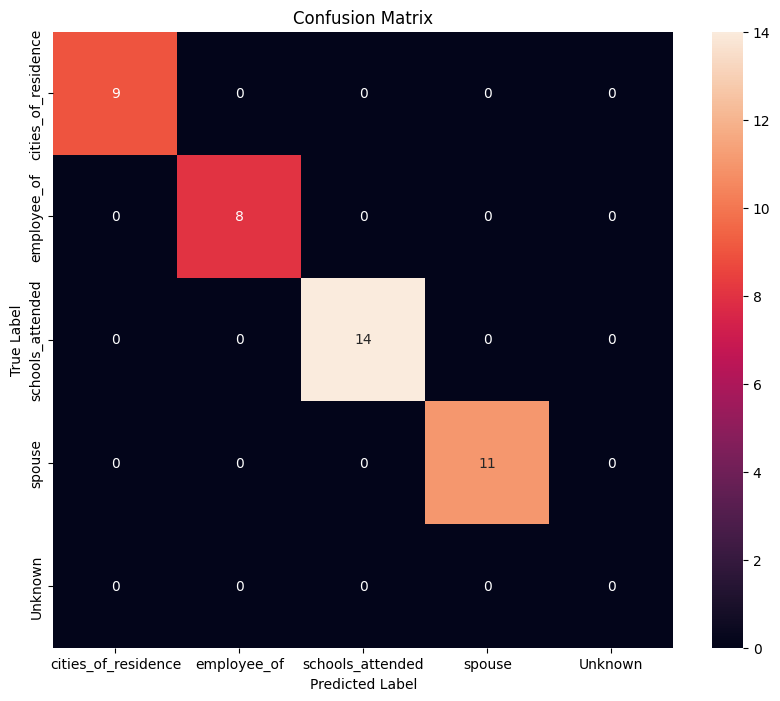

In [63]:
# List of possible relations
relations = ['cities_of_residence', 'employee_of', 'schools_attended', 'spouse', 'Unknown']

# Example usage
metrics_df, detailed_report = evaluate_relation_extraction(merged_df)

# Print detailed evaluation report
print_evaluation_report(metrics_df, detailed_report)

# Plot confusion matrix
plot_confusion_matrix(detailed_report['confusion_matrix'], relations)

# Adding few shots

In [64]:
import json
def extract_json(json_str):
    return json.loads(json_str.replace("```","").replace('json',''))

results_2 = []
for index, row in data.iterrows():
    prompt_template = f"""Analyze the sentence to identify if there is a clear, explicitly stated relation between the subject and object entities. Return ONLY a single JSON key-value pair with "relation" as the key and the matched relation or "Unknown" as the value.

Input:
- Sentence: {row['text']}
- Subject: {row['subject']} 
- Object: {row['object']}

Consider these relations ONLY if directly and unambiguously stated in the sentence:
- cities_of_residence: relates a person to cities where their physical residence is explicitly mentioned in a factual way
- employee_of: relates a person to organizations where their employment status is explicitly mentioned through clear terms like "works for", "is employed by", "joined", etc.
- schools_attended: relates a person to educational institutions where their student status is explicitly mentioned through clear terms like "studies at", "attended", "graduated from", etc.
- spouse: relates a person to persons where their marriage status is explicitly mentioned through clear terms like "married to", "wed", etc.

Return "Unknown" if ANY of these conditions exist:
1. The relation is implied but not explicitly stated
2. Any temporal ambiguity exists about when the relation occurred
3. The sentence contains qualifiers, modalities, or uncertainties
4. The relation direction is not 100% clear
5. Multiple interpretations of the relationship are possible
6. The sentence uses future tense or hypotheticals
7. The relationship is mentioned in passing or as background information
8. Any nuanced context that requires interpretation
9. The sentence describes wishes, plans, or intentions
10. The relation is negated or questioned

Examples:
Elizabeth wants to live in New York. -> Unknown
Elizabeth lives in New York. -> cities_of_residence
Elizabeth is employed by Google. -> employee_of
Elizabeth has been studying at Harvard. -> Unknown
Tesla would be lucky to have John as an employee -> Unknown	
Jill and Jack are getting married. -> Unknown
Jill and Jack are married. -> spouse

Rules
- Do not add any introduction or conclusion to the response

Response:""" 

    print(prompt_template)
    response = llm.complete(prompt_template)
    print(response)
    results_2.append(response.text)


Analyze the sentence to identify if there is a clear, explicitly stated relation between the subject and object entities. Return ONLY a single JSON key-value pair with "relation" as the key and the matched relation or "Unknown" as the value.

Input:
- Sentence: All John wants is to live in Palo Alto.
- Subject: John 
- Object: Palo Alto

Consider these relations ONLY if directly and unambiguously stated in the sentence:
- cities_of_residence: relates a person to cities where their physical residence is explicitly mentioned in a factual way
- employee_of: relates a person to organizations where their employment status is explicitly mentioned through clear terms like "works for", "is employed by", "joined", etc.
- schools_attended: relates a person to educational institutions where their student status is explicitly mentioned through clear terms like "studies at", "attended", "graduated from", etc.
- spouse: relates a person to persons where their marriage status is explicitly mentioned 

In [66]:
results_2 = [extract_json(result) for result in results_2]

In [67]:
results_2

[{'relation': 'Unknown'},
 {'relation': 'Unknown'},
 {'relation': 'Unknown'},
 {'relation': 'Unknown'},
 {'relation': 'Unknown'},
 {'relation': 'Unknown'},
 {'relation': 'Unknown'},
 {'relation': 'Unknown'},
 {'relation': 'Unknown'},
 {'relation': 'Unknown'},
 {'relation': 'Unknown'},
 {'relation': 'Unknown'},
 {'relation': 'Unknown'},
 {'relation': 'Unknown'},
 {'relation': 'Unknown'},
 {'relation': 'Unknown'},
 {'relation': 'Unknown'},
 {'relation': 'Unknown'},
 {'relation': 'Unknown'},
 {'relation': 'Unknown'},
 {'relation': 'Unknown'},
 {'relation': 'Unknown'},
 {'relation': 'Unknown'},
 {'relation': 'Unknown'},
 {'relation': 'Unknown'},
 {'relation': 'Unknown'},
 {'relation': 'Unknown'},
 {'relation': 'Unknown'},
 {'relation': 'Unknown'},
 {'relation': 'Unknown'},
 {'relation': 'Unknown'},
 {'relation': 'Unknown'},
 {'relation': 'Unknown'},
 {'relation': 'Unknown'},
 {'relation': 'Unknown'},
 {'relation': 'Unknown'},
 {'relation': 'Unknown'},
 {'relation': 'Unknown'},
 {'relation'

In [70]:
merged_df_2['predicted_relation'] = merged_df_2['predicted_relation'].str.lower()

In [71]:
merged_df_2

,text,subject,object,relation_in_sentence,predicted_relation
0,All John wants is to live in Palo Alto.,John,Palo Alto,unknown,unknown
1,"Although Jane was married, John was not.",John,Jane,unknown,unknown
2,Apple does not employ John.,John,Apple,unknown,unknown
3,Apple extended a job offer to John.,John,Apple,unknown,unknown
4,Apple gave John an offer for a job.,John,Apple,unknown,unknown
...,...,...,...,...,...
315,John was married to Jane,John,Jane,spouse,spouse
316,John worked for Apple.,John,Apple,employee_of,employee_of
317,John works for Apple.,John,Apple,employee_of,employee_of
318,John's Alma Mater is Stanford University.,John,Stanford University,schools_attended,schools_attended


In [94]:
merged_df_2[merged_df_2['relation_in_sentence'] != merged_df_2['predicted_relation']]

,text,subject,object,relation_in_sentence,predicted_relation
159,John is taking Jane as his wife.,John,Jane,unknown,spouse
280,"In the past, John lived in Palo Alto.",John,Palo Alto,cities_of_residence,unknown
312,John used to live in Palo Alto,John,Palo Alto,cities_of_residence,unknown



=== Relation Extraction Evaluation Report ===

Per-Class Metrics:
           Relation  Precision  Recall       F1  Support
cities_of_residence   1.000000     0.8 0.888889       10
        employee_of   1.000000     1.0 1.000000        8
   schools_attended   1.000000     1.0 1.000000       14
             spouse   0.916667     1.0 0.956522       11
            Unknown   0.000000     0.0 0.000000        0

Overall Accuracy: 99.06%

Per-Class Accuracy:
cities_of_residence: 100.00%
employee_of: 100.00%
schools_attended: 100.00%
spouse: 100.00%
Unknown: nan%

Class Distribution:
unknown: 277 samples (86.6%)
schools_attended: 14 samples (4.4%)
spouse: 11 samples (3.4%)
cities_of_residence: 10 samples (3.1%)
employee_of: 8 samples (2.5%)


/tmp/ipykernel_14154/2363292951.py:42: RuntimeWarning: invalid value encountered in divide
  class_accuracy = cm.diagonal() / cm.sum(axis=1)


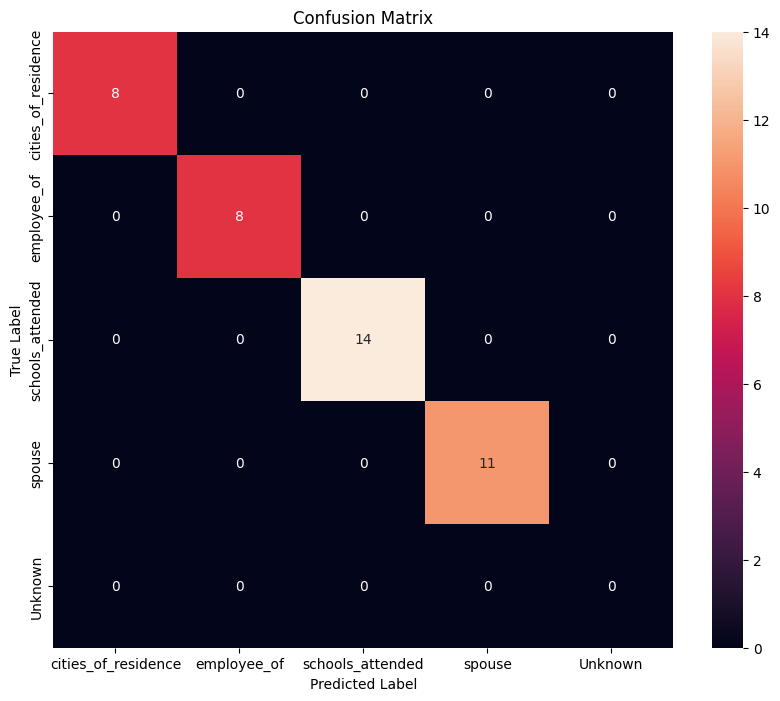

In [72]:

# Example usage
metrics_df, detailed_report = evaluate_relation_extraction(merged_df_2)

# Print detailed evaluation report
print_evaluation_report(metrics_df, detailed_report)

# Plot confusion matrix
plot_confusion_matrix(detailed_report['confusion_matrix'], relations)

In [73]:
import pandas as pd

def generate_test_dataset():
    """
    Generate test dataset for uncertainty and advice/wish scenarios
    """
    # Test cases for uncertainty
    uncertainty_cases = [
        # cities_of_residence uncertainty
        ("It's possible that Maria lives in Seattle", "Maria", "Seattle", "cities_of_residence", "unknown"),
        ("There's a chance John moved to Boston last year", "John", "Boston", "cities_of_residence", "unknown"),
        ("Sarah might be residing in London now", "Sarah", "London", "cities_of_residence", "unknown"),
        ("Reports suggest that Tom could be living in Paris", "Tom", "Paris", "cities_of_residence", "unknown"),
        ("I heard James may have moved to Tokyo", "James", "Tokyo", "cities_of_residence", "unknown"),
        
        # employee_of uncertainty
        ("Emma might work at Google", "Emma", "Google", "employee_of", "unknown"),
        ("There are rumors that David is employed by Microsoft", "David", "Microsoft", "employee_of", "unknown"),
        ("It's possible that Lisa joined Amazon recently", "Lisa", "Amazon", "employee_of", "unknown"),
        ("Sources suggest Alex could be working at Tesla", "Alex", "Tesla", "employee_of", "unknown"),
        ("I think Robert might be employed at Facebook", "Robert", "Facebook", "employee_of", "unknown"),
        
        # schools_attended uncertainty
        ("Kevin might be studying at Stanford", "Kevin", "Stanford", "schools_attended", "unknown"),
        ("There's a possibility that Anna enrolled at Harvard", "Anna", "Harvard", "schools_attended", "unknown"),
        ("I heard Peter could be attending MIT", "Peter", "MIT", "schools_attended", "unknown"),
        ("Reports indicate that Rachel might be at Yale", "Rachel", "Yale", "schools_attended", "unknown"),
        ("Sophie possibly studied at Oxford", "Sophie", "Oxford", "schools_attended", "unknown"),
        
        # spouse uncertainty
        ("There are rumors that Mike and Jessica might be married", "Mike", "Jessica", "spouse", "unknown"),
        ("It's possible that Eric and Diana got married", "Eric", "Diana", "spouse", "unknown"),
        ("People say Chris and Laura could be married", "Chris", "Laura", "spouse", "unknown"),
        ("I heard that Paul and Linda might have tied the knot", "Paul", "Linda", "spouse", "unknown"),
        ("There's speculation that Mark and Amy are married", "Mark", "Amy", "spouse", "unknown"),
    ]
    
    # Test cases for advice/wish
    advice_wish_cases = [
        # cities_of_residence advice/wish
        ("Jake should move to Chicago", "Jake", "Chicago", "cities_of_residence", "unknown"),
        ("I wish Emily would live in San Francisco", "Emily", "San Francisco", "cities_of_residence", "unknown"),
        ("It would be great if Daniel moved to Miami", "Daniel", "Miami", "cities_of_residence", "unknown"),
        ("Helen ought to consider living in Vancouver", "Helen", "Vancouver", "cities_of_residence", "unknown"),
        ("I hope Nathan relocates to Austin", "Nathan", "Austin", "cities_of_residence", "unknown"),
        
        # employee_of advice/wish
        ("Susan should apply to work at IBM", "Susan", "IBM", "employee_of", "unknown"),
        ("I wish Brian would join Apple", "Brian", "Apple", "employee_of", "unknown"),
        ("It would be nice if Karen worked at Netflix", "Karen", "Netflix", "employee_of", "unknown"),
        ("Tim ought to consider working at Intel", "Tim", "Intel", "employee_of", "unknown"),
        ("I hope Michelle gets a job at Twitter", "Michelle", "Twitter", "employee_of", "unknown"),
        
        # schools_attended advice/wish
        ("Andrew should attend Princeton", "Andrew", "Princeton", "schools_attended", "unknown"),
        ("I wish Julia would study at Columbia", "Julia", "Columbia", "schools_attended", "unknown"),
        ("It would be great if Rick enrolled at Berkeley", "Rick", "Berkeley", "schools_attended", "unknown"),
        ("Emma ought to consider attending UCLA", "Emma", "UCLA", "schools_attended", "unknown"),
        ("I hope Patrick goes to Cambridge", "Patrick", "Cambridge", "schools_attended", "unknown"),
        
        # spouse advice/wish
        ("Steve and Mary should get married", "Steve", "Mary", "spouse", "unknown"),
        ("I wish Jack and Kate would tie the knot", "Jack", "Kate", "spouse", "unknown"),
        ("It would be nice if Tom and Sarah got married", "Tom", "Sarah", "spouse", "unknown"),
        ("Dave and Lisa ought to consider marriage", "Dave", "Lisa", "spouse", "unknown"),
        ("I hope Bill and Nancy get married someday", "Bill", "Nancy", "spouse", "unknown"),
    ]
    
    # Combine all test cases
    all_cases = uncertainty_cases + advice_wish_cases
    
    # Create DataFrame
    df = pd.DataFrame(all_cases, columns=['text', 'subject', 'object', 'relation_type', 'relation_in_sentence'])
    
    return df


In [75]:
# Generate test dataset
test_df = generate_test_dataset()
# drop the relation_type
test_df.drop(columns=['relation_type'], inplace=True)
test_df

,text,subject,object,relation_in_sentence
0,It's possible that Maria lives in Seattle,Maria,Seattle,unknown
1,There's a chance John moved to Boston last year,John,Boston,unknown
2,Sarah might be residing in London now,Sarah,London,unknown
3,Reports suggest that Tom could be living in Paris,Tom,Paris,unknown
4,I heard James may have moved to Tokyo,James,Tokyo,unknown
5,Emma might work at Google,Emma,Google,unknown
6,There are rumors that David is employed by Mic...,David,Microsoft,unknown
7,It's possible that Lisa joined Amazon recently,Lisa,Amazon,unknown
8,Sources suggest Alex could be working at Tesla,Alex,Tesla,unknown
9,I think Robert might be employed at Facebook,Robert,Facebook,unknown


# We repeat with our best model

In [76]:
import json
def extract_json(json_str):
    return json.loads(json_str.replace("```","").replace('json',''))

test_results = []
for index, row in test_df.iterrows():
    prompt_template = f"""Analyze the sentence to identify if there is a clear, explicitly stated relation between the subject and object entities. Return ONLY a single JSON key-value pair with "relation" as the key and the matched relation or "Unknown" as the value.

Input:
- Sentence: {row['text']}
- Subject: {row['subject']} 
- Object: {row['object']}

Consider these relations ONLY if directly and unambiguously stated in the sentence:
- cities_of_residence: relates a person to cities where their physical residence is explicitly mentioned in a factual way
- employee_of: relates a person to organizations where their employment status is explicitly mentioned through clear terms like "works for", "is employed by", "joined", etc.
- schools_attended: relates a person to educational institutions where their student status is explicitly mentioned through clear terms like "studies at", "attended", "graduated from", etc.
- spouse: relates a person to persons where their marriage status is explicitly mentioned through clear terms like "married to", "wed", etc.

Return "Unknown" if ANY of these conditions exist:
1. The relation is implied but not explicitly stated
2. Any temporal ambiguity exists about when the relation occurred
3. The sentence contains qualifiers, modalities, or uncertainties
4. The relation direction is not 100% clear
5. Multiple interpretations of the relationship are possible
6. The sentence uses future tense or hypotheticals
7. The relationship is mentioned in passing or as background information
8. Any nuanced context that requires interpretation
9. The sentence describes wishes, plans, or intentions
10. The relation is negated or questioned

Examples:
Elizabeth wants to live in New York. -> Unknown
Elizabeth lives in New York. -> cities_of_residence
Elizabeth is employed by Google. -> employee_of
Elizabeth has been studying at Harvard. -> Unknown
Tesla would be lucky to have John as an employee -> Unknown	
Jill and Jack are getting married. -> Unknown
Jill and Jack are married. -> spouse

Rules
- Do not add any introduction or conclusion to the response

Response:""" 

    print(prompt_template)
    response = llm.complete(prompt_template)
    print(response)
    test_results.append(response.text)


Analyze the sentence to identify if there is a clear, explicitly stated relation between the subject and object entities. Return ONLY a single JSON key-value pair with "relation" as the key and the matched relation or "Unknown" as the value.

Input:
- Sentence: It's possible that Maria lives in Seattle
- Subject: Maria 
- Object: Seattle

Consider these relations ONLY if directly and unambiguously stated in the sentence:
- cities_of_residence: relates a person to cities where their physical residence is explicitly mentioned in a factual way
- employee_of: relates a person to organizations where their employment status is explicitly mentioned through clear terms like "works for", "is employed by", "joined", etc.
- schools_attended: relates a person to educational institutions where their student status is explicitly mentioned through clear terms like "studies at", "attended", "graduated from", etc.
- spouse: relates a person to persons where their marriage status is explicitly mentioned

In [77]:
test_results = [extract_json(result) for result in test_results]
test_results = pd.concat([test_df, pd.DataFrame(test_results)], axis=1)


In [80]:
test_results['relation'] = test_results['relation'].str.lower()

In [84]:
# Rename columns
test_results.rename(columns={"relation": "predicted_relation"}, inplace=True)

In [87]:
merged_df

,text,subject,object,relation_in_sentence,predicted_relation
0,All John wants is to live in Palo Alto.,John,Palo Alto,unknown,unknown
1,"Although Jane was married, John was not.",John,Jane,unknown,unknown
2,Apple does not employ John.,John,Apple,unknown,unknown
3,Apple extended a job offer to John.,John,Apple,unknown,unknown
4,Apple gave John an offer for a job.,John,Apple,unknown,unknown
...,...,...,...,...,...
315,John was married to Jane,John,Jane,spouse,spouse
316,John worked for Apple.,John,Apple,employee_of,employee_of
317,John works for Apple.,John,Apple,employee_of,employee_of
318,John's Alma Mater is Stanford University.,John,Stanford University,schools_attended,schools_attended


In [86]:
test_results

,text,subject,object,relation_in_sentence,predicted_relation
0,It's possible that Maria lives in Seattle,Maria,Seattle,unknown,unknown
1,There's a chance John moved to Boston last year,John,Boston,unknown,unknown
2,Sarah might be residing in London now,Sarah,London,unknown,unknown
3,Reports suggest that Tom could be living in Paris,Tom,Paris,unknown,unknown
4,I heard James may have moved to Tokyo,James,Tokyo,unknown,unknown
5,Emma might work at Google,Emma,Google,unknown,unknown
6,There are rumors that David is employed by Mic...,David,Microsoft,unknown,unknown
7,It's possible that Lisa joined Amazon recently,Lisa,Amazon,unknown,unknown
8,Sources suggest Alex could be working at Tesla,Alex,Tesla,unknown,unknown
9,I think Robert might be employed at Facebook,Robert,Facebook,unknown,unknown


In [88]:
test_results

,text,subject,object,relation_in_sentence,predicted_relation
0,It's possible that Maria lives in Seattle,Maria,Seattle,unknown,unknown
1,There's a chance John moved to Boston last year,John,Boston,unknown,unknown
2,Sarah might be residing in London now,Sarah,London,unknown,unknown
3,Reports suggest that Tom could be living in Paris,Tom,Paris,unknown,unknown
4,I heard James may have moved to Tokyo,James,Tokyo,unknown,unknown
5,Emma might work at Google,Emma,Google,unknown,unknown
6,There are rumors that David is employed by Mic...,David,Microsoft,unknown,unknown
7,It's possible that Lisa joined Amazon recently,Lisa,Amazon,unknown,unknown
8,Sources suggest Alex could be working at Tesla,Alex,Tesla,unknown,unknown
9,I think Robert might be employed at Facebook,Robert,Facebook,unknown,unknown



=== Relation Extraction Evaluation Report ===

Per-Class Metrics:
Relation  Precision  Recall  F1  Support
 unknown        1.0     1.0 1.0       40

Overall Accuracy: 100.00%

Per-Class Accuracy:
unknown: 100.00%

Class Distribution:
unknown: 40 samples (100.0%)


/home/jason/Documents/coding_repos/chatbot_app/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


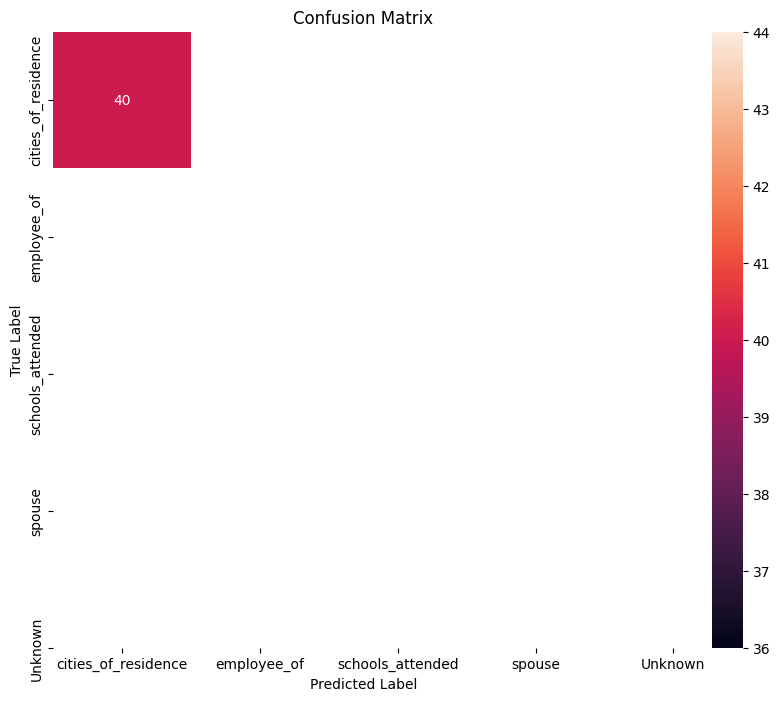

In [92]:
# Example usage
metrics_df_test, detailed_report_test = evaluate_relation_extraction(test_results)

# Print detailed evaluation report
print_evaluation_report(metrics_df_test, detailed_report_test)

# Plot confusion matrix
plot_confusion_matrix(detailed_report_test['confusion_matrix'], relations)